In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
!ls "/content/drive/My Drive"

 cig_butts		     lemmatization.ipynb	   КОРСТ
 Cigs			     module04_mnist_fc.ipynb.txt   Лекции
 coco_annotations_test.txt   task2_word_embeddings.ipynb  'общефиз лекции'
'Colab Notebooks'	     Квантмех.docx


In [26]:
with open('/content/drive/My Drive/coco_annotations_test.txt', 'r') as f:
    print(f.readline())

{"info": {"description": "ImmersiveLimit Cigarette Butt Dataset", "url": "http://www.immersivelimit.com", "version": "0.1", "year": 2018, "contributor": "Adam Kelly", "date_created": "2018/07/27"}, "licenses": [{"url": "http://www.immersivelimit.com/noncommercial-educational-license-agreement", "id": 0, "name": "ImmersiveLimit.com Non-Commercial, Educational License Agreement"}], "images": [{"license": 0, "file_name": "00000000.jpg", "width": 512, "height": 512, "id": 0}, {"license": 0, "file_name": "00000001.jpg", "width": 512, "height": 512, "id": 1}, {"license": 0, "file_name": "00000002.jpg", "width": 512, "height": 512, "id": 2}, {"license": 0, "file_name": "00000003.jpg", "width": 512, "height": 512, "id": 3}, {"license": 0, "file_name": "00000004.jpg", "width": 512, "height": 512, "id": 4}, {"license": 0, "file_name": "00000005.jpg", "width": 512, "height": 512, "id": 5}, {"license": 0, "file_name": "00000006.jpg", "width": 512, "height": 512, "id": 6}, {"license": 0, "file_name

In [27]:
!ls "/content/drive/My Drive/Cigs/train"

coco_annotations.json  coco_annotations_test.txt  images


In [28]:
import torchvision.datasets as dset
import torchvision.transforms as transforms
cap = dset.CocoDetection(root='/content/drive/My Drive/Cigs/train/images',
                        annFile='/content/drive/My Drive/Cigs/train/coco_annotations_test.txt',
                        transform=transforms.ToTensor())

print('Number of samples: ', len(cap))
img, target = cap[0] # load 4th sample

print("Image Size: ", img.size())
print(target)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
Number of samples:  2000
Image Size:  torch.Size([3, 512, 512])
[{'segmentation': [[344.0, 427.5, 367.0, 412.5, 388.0, 401.5, 392.0, 397.5, 395.0, 397.5, 404.0, 392.5, 406.5, 390.0, 406.5, 387.0, 402.5, 380.0, 397.0, 375.5, 389.0, 376.5, 385.0, 380.5, 363.0, 391.5, 335.0, 410.5, 331.0, 411.5, 329.5, 415.0, 335.0, 417.5, 338.5, 421.0, 340.5, 426.0, 344.0, 427.5]], 'iscrowd': 0, 'image_id': 0, 'category_id': 1, 'id': 0, 'bbox': [329.5, 375.5, 77.0, 52.0], 'area': 1510.5}]


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 8.0)

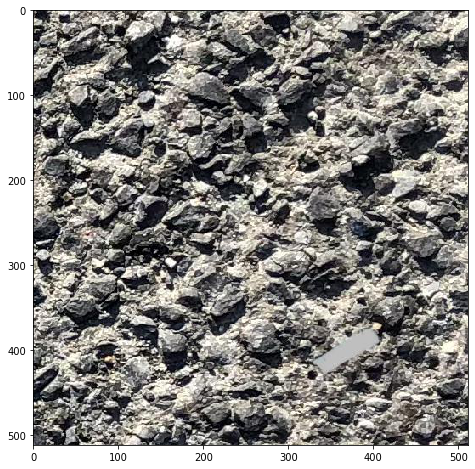

In [30]:
plt.imshow(img.permute(1, 2, 0))

In [31]:
!pip install gluoncv

In [32]:
!pip install mxnet

In [0]:
import numpy as np
from gluoncv import utils

In [0]:
import torch

Image size (height, width, RGB): (512, 512, 3)


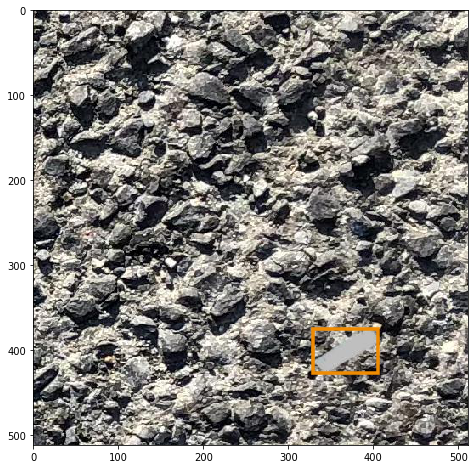

In [35]:
train_image, train_label = cap[0]
train_image = train_image.numpy()
train_image = torch.from_numpy(train_image).permute(1, 2, 0)
train_image = train_image.numpy()

#train_image = train_image.reshape((512, 512, 3))
#train_image = train_image.view(dtype=np.int16)

bounding_boxes = train_label[0]['bbox']
print('Image size (height, width, RGB):', train_image.shape)

#print('Num of objects:', bounding_boxes.shape[0])
#print('Bounding boxes (num_boxes, x_min, y_min, x_max, y_max):\n',
  #    bounding_boxes)
#print('Class IDs (num_boxes, ):\n', class_ids)

x_min, y_min, delta_x, delta_y = bounding_boxes
# utils.viz.plot_image(train_image, ax=None, reverse_rgb=False)
utils.viz.plot_bbox(train_image, [[x_min, y_min, x_min + delta_x, y_min + delta_y]], scores=None)
plt.imshow(train_image)
plt.show()

In [0]:
#cigarette_mask = np.array(train_label[0]['segmentation'])
#utils.viz.plot_keypoints(img, coords=cigarette_mask, bboxes=[[x_min, y_min, x_min + delta_x, y_min + delta_y]], confidence=)

In [0]:
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [0]:
# -- Define our neural net architecture
# The original paper has 1 input channel, in our case we have 3 (RGB)
net = unet_origin.UNetOriginal((3, *img_resize))
classifier = nn.classifier.CarvanaClassifier(net, epochs)
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.99)

train_ds = TrainImageDataset(X_train, y_train, input_img_resize, output_img_resize, X_transform=aug.augment_img)
train_loader = DataLoader(train_ds, batch_size,
                          sampler=RandomSampler(train_ds),
                          num_workers=threads,
                          pin_memory=use_cuda)

valid_ds = TrainImageDataset(X_valid, y_valid, input_img_resize, output_img_resize, threshold=threshold)
valid_loader = DataLoader(valid_ds, batch_size,
                          sampler=SequentialSampler(valid_ds),
                          num_workers=threads,
                          pin_memory=use_cuda)